In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Enter DB name
DB_PATH = '../data/FPA_FOD_20170508.sqlite'

In [3]:
# Create connection.
cnx = sqlite3.connect(DB_PATH)

# Load table into Pandas dataframe
df = pd.read_sql_query("SELECT FIRE_YEAR, DISCOVERY_DATE, STAT_CAUSE_DESCR, STAT_CAUSE_CODE, FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, STATE, COUNTY, FIPS_NAME FROM Fires", cnx)

df.head()

,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME
0,2005,2453403.5,Miscellaneous,9.0,0.10,A,40.036944,-121.005833,CA,63,Plumas
1,2004,2453137.5,Lightning,1.0,0.25,A,38.933056,-120.404444,CA,61,Placer
2,2004,2453156.5,Debris Burning,5.0,0.10,A,38.984167,-120.735556,CA,17,El Dorado
3,2004,2453184.5,Lightning,1.0,0.10,A,38.559167,-119.913333,CA,3,Alpine
4,2004,2453184.5,Lightning,1.0,0.10,A,38.559167,-119.933056,CA,3,Alpine


In [4]:
df.shape

(1880465, 11)

In [ ]:
# Let's extract data to CSV file to avoid loading time
df.to_csv("data/1.88_Million_US_Wildfires.csv")

## Have wildfires become more or less frequent over time?

In [5]:
df1 = df['FIRE_YEAR'].value_counts().sort_index(ascending = True).reset_index()
df1.columns = ['FIRE_YEAR','Count']

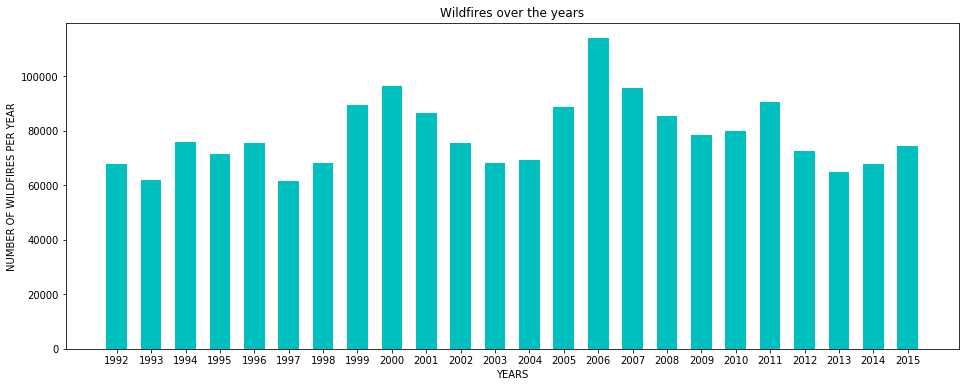

In [6]:
plt.rcParams["figure.figsize"] = (16,6)

plt.bar(df1['FIRE_YEAR'], df1['Count'], width=0.6, color = 'c')

plt.xlabel('YEARS')
plt.ylabel('NUMBER OF WILDFIRES PER YEAR')

plt.xticks(df1['FIRE_YEAR'])
plt.title('Wildfires over the years')

plt.savefig("../static/images/over_years.jpg", bbox_inches='tight')
plt.show()

**When we look at the graph, we see that there are decreases and increases over time, hence we cannot be certain about whether wildfires become more or less frequent over time**

## What counties are the most and least fire-prone?

If we sort the number of Wildfires for each County, we can have an insight to understand the most and least fire-prone counties

In [7]:
df2 = df['FIPS_NAME'].value_counts().reset_index()
df2.columns = ['FIPS_NAME','Count']
df2.sort_values(by='Count', ascending=False)

,FIPS_NAME,Count
0,Washington,11014
1,Lincoln,10571
2,Jackson,9902
3,Marion,8908
4,Cherokee,8558
...,...,...
1673,Richmond (city),1
1675,Pepin,1
1676,Kingfisher,1
1677,Dubois,1


**When we look at the dataframe, we can clearly say that the least fire-prone counties are the ones which have 1 wildfire over the years.**

In [8]:
# Put the Counties' name into listt to examine clearly
least_fire_prone = df2["FIPS_NAME"].loc[df2['Count'] == 1]
least_fire_prone

1662                    Wells
1663                   Rogers
1664                   Garden
1665                Ascension
1666                  Fairfax
1667                 Canadian
1668                Faribault
1669                Hillsdale
1670                     Love
1671         Gurabo Municipio
1672                    Toole
1673          Richmond (city)
1674                   Denver
1675                    Pepin
1676               Kingfisher
1677                   Dubois
1678                  Gratiot
1679                 Costilla
1680               Terrebonne
1681                Concordia
1682           Glacier County
1683                 Cuyahoga
1684                  O'Brien
1685                  Alfalfa
1686         Buena Vista City
1687             Hampton City
1688                   Garvin
1689                  Ozaukee
1690    Colonial Heights City
1691                Pipestone
1692            Kodiak Island
1693                Milwaukee
1694                  Daniels
1695      

**We can see the least fire-prone counties above. If we want to see the most fire-prone counties:**

Let's pick top 5 of the most fire-prone counties

In [9]:
most_fire_prone = df2["FIPS_NAME"][:5]
most_fire_prone

0    Washington
1       Lincoln
2       Jackson
3        Marion
4      Cherokee
Name: FIPS_NAME, dtype: object

### Which states have the most fires? We can also observe that (Let's take top 10)

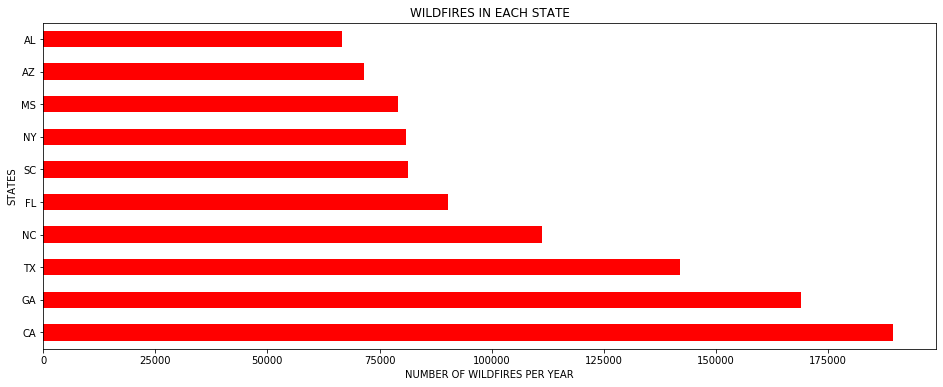

In [11]:
df['STATE'].value_counts().head(n=10).plot(kind='barh', color='r')

plt.xlabel('NUMBER OF WILDFIRES PER YEAR')
plt.ylabel('STATES')
plt.title("WILDFIRES IN EACH STATE")

plt.savefig("../static/images/state_per_wildfire.jpg", bbox_inches='tight')
plt.show()

In [10]:
cursor = cnx.cursor()

In [11]:
a = cursor.execute('SELECT FIRE_SIZE, STATE FROM Fires;').fetchall()